In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ehrapy as ep

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
current_notebook_dir = %pwd

_TEST_IMAGE_PATH = f"{current_notebook_dir}/../plot/_images"

In [4]:
adata_full = ep.dt.mimic_2(columns_obs_only=["service_unit", "day_icu_intime"])
adata_full = adata_full[~np.isnan(adata_full.X).any(axis=1)].copy()
adata = adata_full[:200, :].copy()
del adata_full
adata = ep.pp.encode(adata, autodetect=True)

! Features 'aline_flg', 'gender_num', 'service_num', 'day_icu_intime_num', 'hour_icu_intime', 'hosp_exp_flg', 'icu_exp_flg', 'day_28_flg', 'censor_flg', 'sepsis_flg', 'chf_flg', 'afib_flg', 'renal_flg', 'liver_flg', 'copd_flg', 'cad_flg', 'stroke_flg', 'mal_flg', 'resp_flg' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.
! Detected no columns that need to be encoded. Leaving passed AnnData object unchanged.


In [5]:
ep.pp.pca(adata)
ep.pp.neighbors(adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


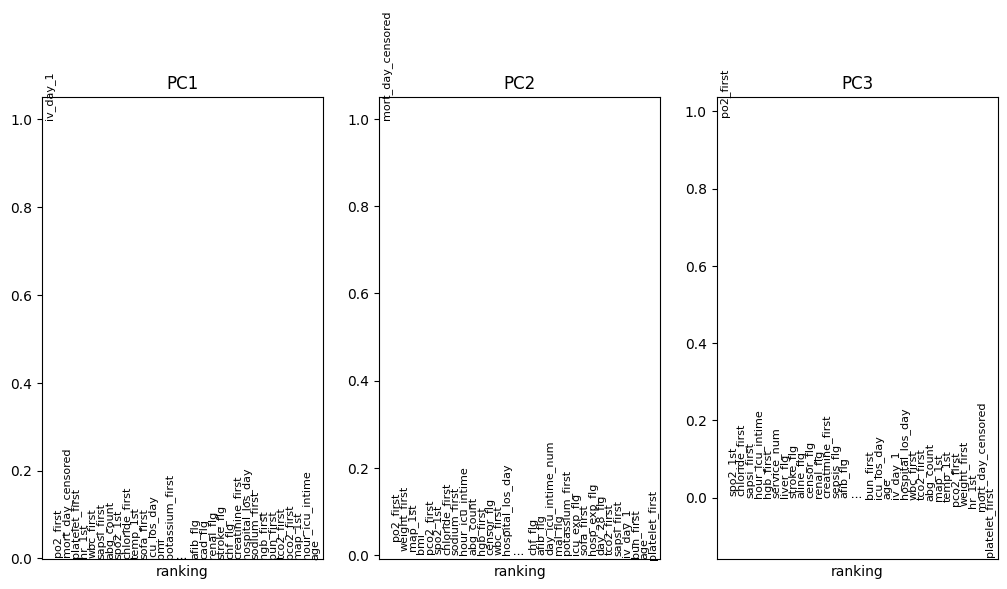

In [6]:
ep.pl.pca_loadings(adata, components="1,2,3", show=False)
plt.gcf().set_size_inches(12, 6)
plt.gcf().subplots_adjust(left=0.2, right=0.8, bottom=0.2, top=0.8)

plt.gcf().savefig(f"{_TEST_IMAGE_PATH}/pca_loadings_expected.png", dpi=80)